<a href="https://colab.research.google.com/github/Sourav61/Goeduhub-Assignments/blob/main/Task_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Author: <a href = "https://github.com/Sourav61">Sourav Pahwa</a>
<br>ID: GO_STP_13420

<b>Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,</b>

Measure accuracy of your model using different kernels such as rbf and linear.
Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
Use 80% of samples as training data size

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [ ]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df = pd.DataFrame(digits.data)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,14.0,0.0,0.0,0.0,0.0,13.0,16.0,15.0,10.0,1.0,0.0,0.0,0.0,11.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,9.0,0.0,0.0,0.0,5.0,4.0,12.0,16.0,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0,7.0,2.0,0.0,0.0,0.0,0.0,13.0,16.0,13.0,16.0,3.0,0.0,0.0,0.0,7.0,16.0,11.0,15.0,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,7.0,7.0,4.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,1.0,0.0,0.0,4.0,8.0,8.0,15.0,15.0,6.0,0.0,0.0,2.0,11.0,15.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,12.0,14.0,14.0,12.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,15.0,4.0,0.0,0.0,0.0,3.0,16.0,12.0,14.0,2.0,0.0,0.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.0,16.0,8.0,10.0,13.0,2.0,0.0,0.0,1.0,15.0,1.0,3.0,16.0,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,3.0,16.0,12.0,10.0,14.0,0.0,0.0,0.0,1.0,16.0,1.0,12.0,15.0,0.0,0.0,0.0,0.0,13.0,16.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [ ]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
1787,0.0,0.0,10.0,16.0,15.0,1.0,0.0,0.0,0.0,0.0,16.0,12.0,5.0,0.0,0.0,0.0,0.0,2.0,16.0,9.0,4.0,0.0,0.0,0.0,0.0,4.0,16.0,16.0,16.0,14.0,2.0,0.0,0.0,1.0,10.0,4.0,1.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,7.0,0.0,0.0,0.0,7.0,8.0,14.0,16.0,3.0,0.0,0.0,0.0,6.0,13.0,10.0,4.0,0.0,0.0
1788,0.0,0.0,0.0,1.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,15.0,2.0,0.0,0.0,0.0,0.0,8.0,16.0,6.0,1.0,2.0,0.0,0.0,4.0,16.0,9.0,1.0,15.0,9.0,0.0,0.0,13.0,15.0,6.0,10.0,16.0,6.0,0.0,0.0,12.0,16.0,16.0,16.0,16.0,1.0,0.0,0.0,1.0,7.0,4.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,9.0,0.0,0.0
1789,0.0,0.0,8.0,16.0,3.0,0.0,1.0,0.0,0.0,0.0,16.0,14.0,5.0,14.0,12.0,0.0,0.0,0.0,8.0,16.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,16.0,14.0,1.0,0.0,0.0,0.0,0.0,12.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,16.0,11.0,16.0,4.0,0.0,0.0,0.0,3.0,16.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,10.0,16.0,10.0,1.0,0.0,0.0
1790,0.0,0.0,5.0,12.0,8.0,0.0,1.0,0.0,0.0,0.0,11.0,16.0,5.0,13.0,6.0,0.0,0.0,0.0,2.0,15.0,16.0,12.0,1.0,0.0,0.0,0.0,0.0,10.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,15.0,16.0,7.0,0.0,0.0,0.0,0.0,8.0,16.0,16.0,11.0,0.0,0.0,0.0,0.0,11.0,16.0,16.0,9.0,0.0,0.0,0.0,0.0,6.0,12.0,12.0,3.0,0.0,0.0
1791,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,4.0,16.0,12.0,0.0,0.0,0.0,0.0,0.0,12.0,15.0,3.0,4.0,3.0,0.0,0.0,7.0,16.0,5.0,3.0,15.0,8.0,0.0,0.0,13.0,16.0,13.0,15.0,16.0,2.0,0.0,0.0,12.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,0.0,4.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,16.0,14.0,6.0,1.0,0.0,0.0,0.0,0.0,15.0,15.0,8.0,15.0,0.0,0.0,0.0,0.0,5.0,16.0,16.0,10.0,0.0,0.0,0.0,0.0,12.0,15.0,15.0,12.0,0.0,0.0,0.0,4.0,16.0,6.0,4.0,16.0,6.0,0.0,0.0,8.0,16.0,10.0,8.0,16.0,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [ ]:
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,15.000000,16.000000,15.000000,14.000000,2.000000,0.000000,0.000000,4.000000,15.000000,12.000000,13.000000,14.00

In [ ]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
59    float64
60    float64
61    float64
62    float64
63    float64
Length: 64, dtype: object

In [ ]:
df.describe().style.background_gradient(cmap='PuBu', low=0, high=0, axis=0, subset=None, text_color_threshold=0.408, vmin=None, vmax=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.000000,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.000000,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.000000,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.000000,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.000000,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.000000,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.000000,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.000000,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.000000,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,15.000000,16.000

In [ ]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df)

,Data Type,No of Levels,Levels
0,float64,1,[0.]
1,float64,9,[0. 2. 5. 1. 6. 3. 4. 7. 8.]
2,float64,17,[ 5. 0. 7. 12. 9. 11. 1. 10. 6. 3. 8. ...
3,float64,17,[13. 12. 4. 15. 1. 10. 8. 14. 9. 0. 7. ...
4,float64,17,[ 9. 13. 15. 11. 0. 8. 14. 1. 16. 4. 5. 1...
...,...,...,...
59,float64,17,[13. 11. 3. 2. 16. 9. 5. 12. 10. 1. 7. 1...
60,float64,17,[10. 16. 11. 13. 15. 0. 8. 2. 9. 5. 12. ...
61,float64,17,[ 0. 10. 16. 9. 4. 11. 3. 13. 15. 12. 2. ...
62,float64,17,[ 0. 9. 3. 1. 12. 11. 4. 13. 7. 5. 2. ...


In [ ]:
df.duplicated().sum() 

0

In [ ]:
df.isnull().sum(axis=0)

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

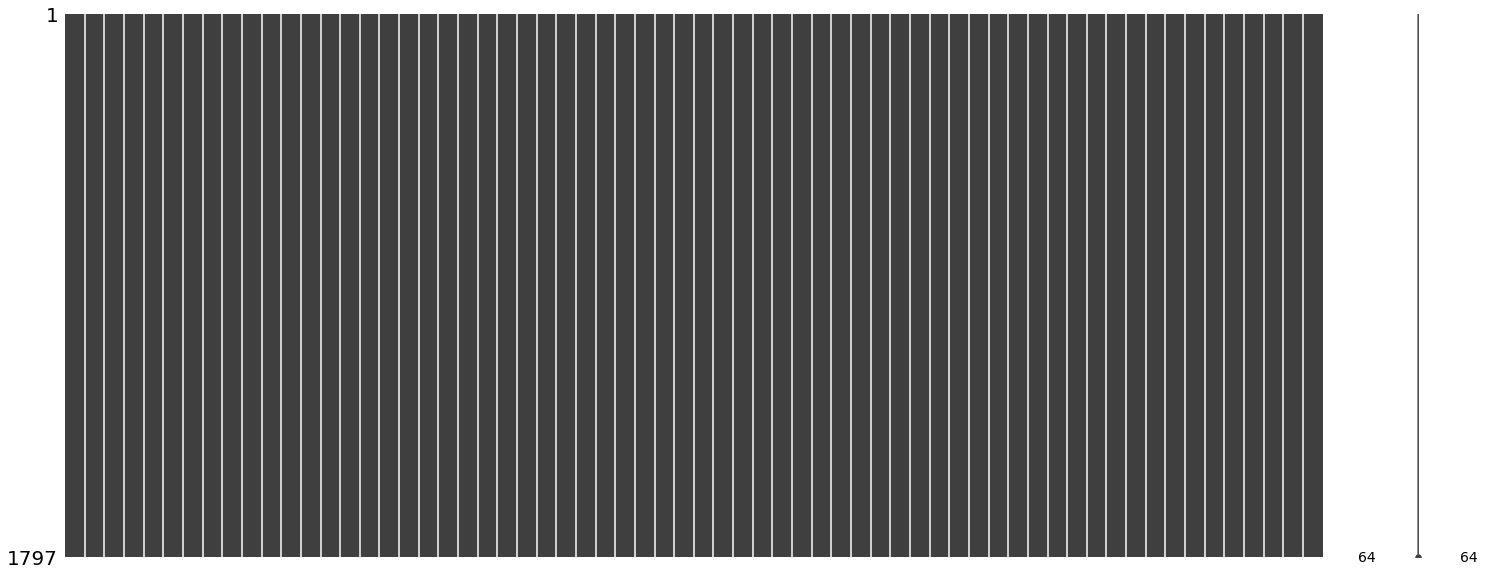

In [ ]:
import missingno as msno
msno.matrix(df.sample(1797))
plt.show()

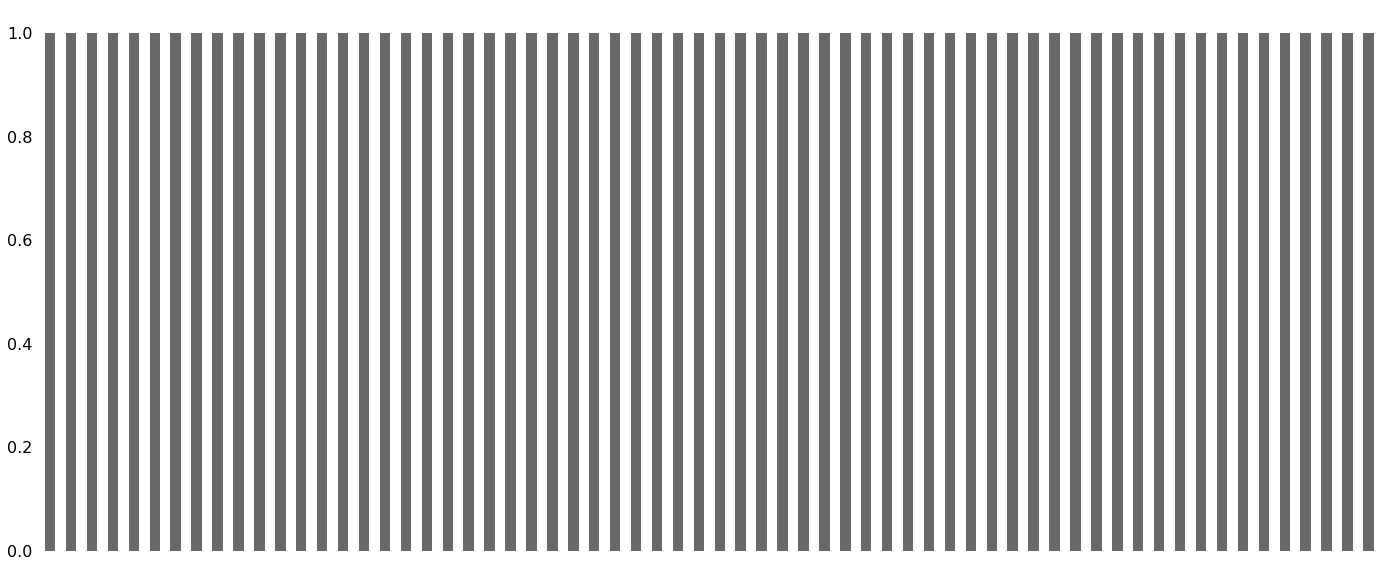

In [ ]:
msno.bar(df.sample(1797))
plt.show()

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.target.shape

(1797,)

<Figure size 432x288 with 0 Axes>

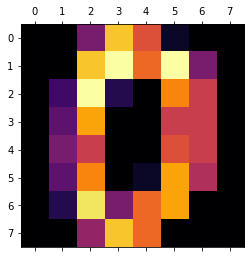

In [ ]:
plt.inferno()
plt.matshow(digits.images[0]) 
plt.show()

<Figure size 432x288 with 0 Axes>

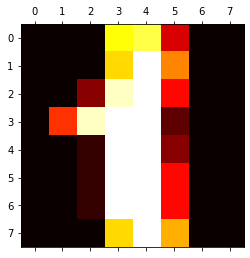

In [ ]:
plt.hot()
plt.matshow(digits.images[1]) 
plt.show()

<Figure size 432x288 with 0 Axes>

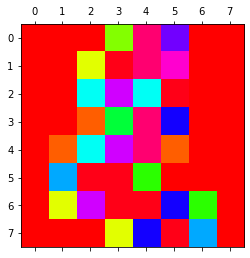

In [ ]:
plt.hsv()
plt.matshow(digits.images[2]) 
plt.show()

<Figure size 432x288 with 0 Axes>

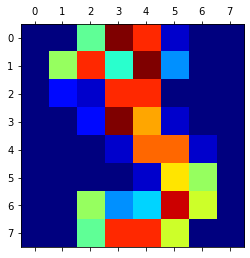

In [ ]:
plt.jet()
plt.matshow(digits.images[3]) 
plt.show()

<Figure size 432x288 with 0 Axes>

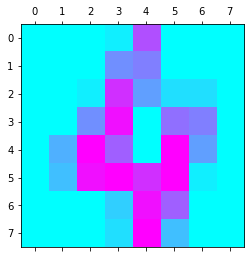

In [ ]:
plt.cool()
plt.matshow(digits.images[4]) 
plt.show()

<Figure size 432x288 with 0 Axes>

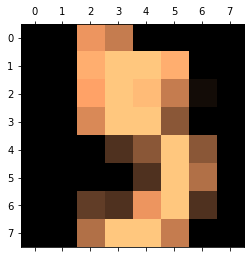

In [ ]:
plt.copper()
plt.matshow(digits.images[5]) 
plt.show()

<Figure size 432x288 with 0 Axes>

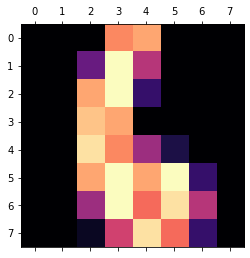

In [ ]:
plt.magma()
plt.matshow(digits.images[6]) 
plt.show()

(array([[31.,  3.,  2., ...,  3.,  4.,  3.],
        [37.,  3.,  0., ...,  1.,  1., 13.],
        [33.,  3.,  1., ...,  1.,  4., 11.],
        ...,
        [33.,  2.,  1., ...,  0.,  3., 16.],
        [29.,  4.,  4., ...,  2.,  3., 11.],
        [29.,  1.,  2., ...,  4.,  3., 12.]]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 1797 Lists of Patches objects>)

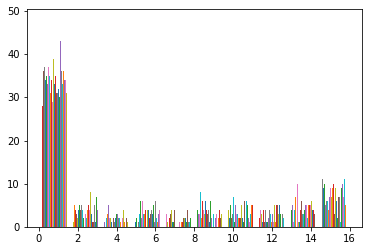

In [ ]:
plt.hist(df)

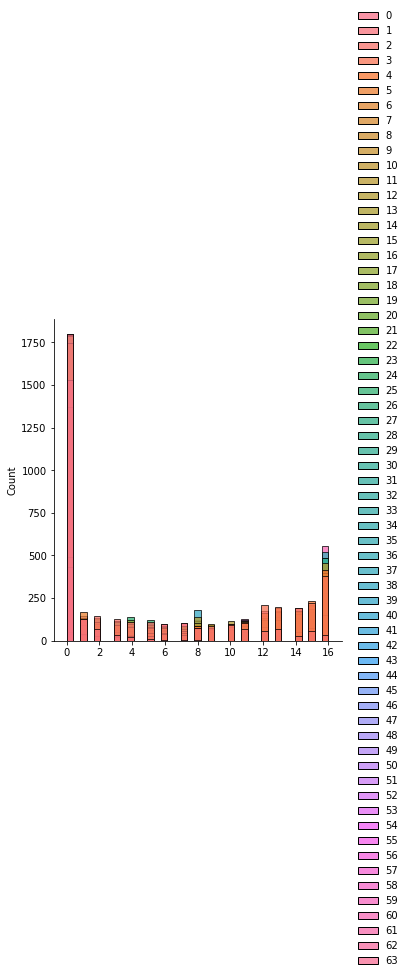

In [ ]:
sns.displot(df)
plt.show()

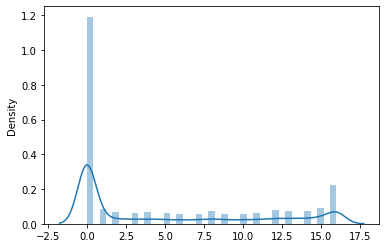

In [ ]:
sns.distplot(df)
plt.show()

No handles with labels found to put in legend.


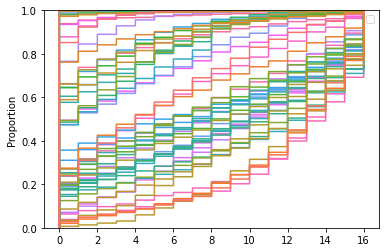

In [ ]:
sns.ecdfplot(data=df)
plt.legend()

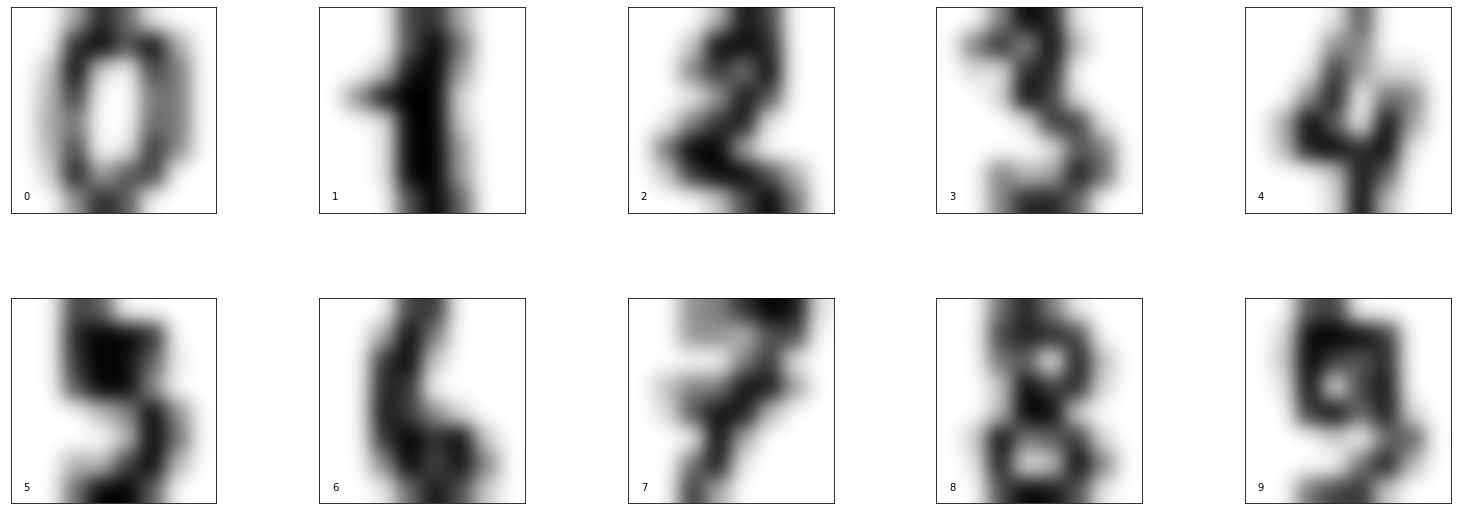

In [ ]:
fig = plt.figure(figsize=(20, 20)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.5)

for i in range(10):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='gaussian')
    ax.text(0, 7, str(digits.target[i]))

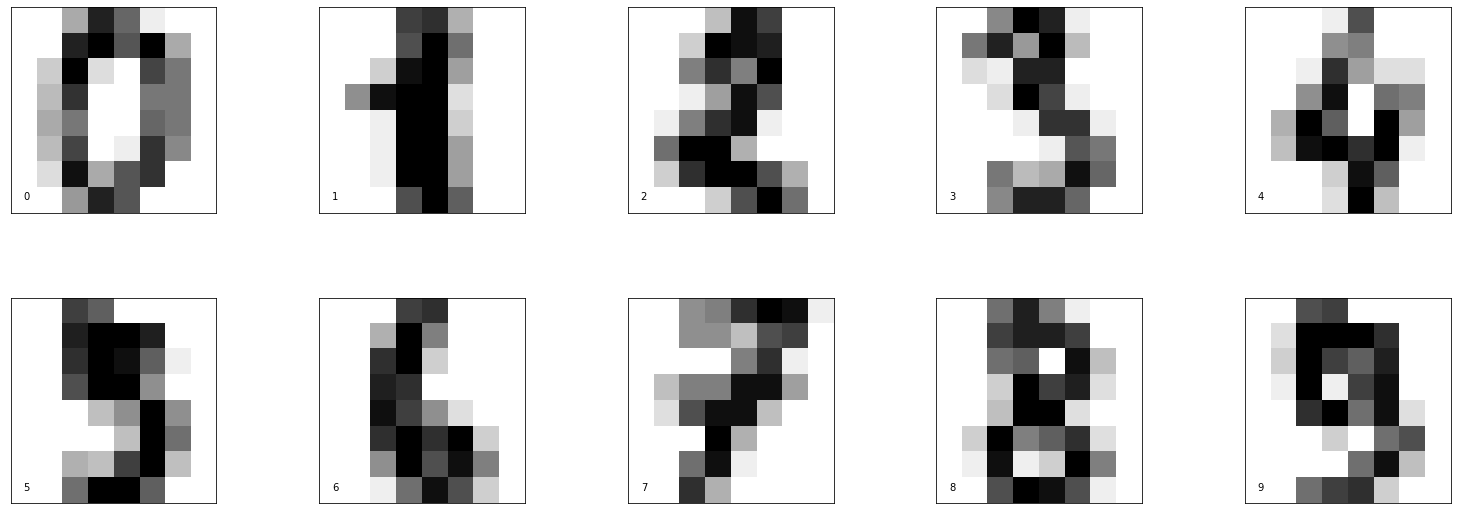

In [ ]:
fig = plt.figure(figsize=(20, 20)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.5)

for i in range(10):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='antialiased')
    ax.text(0, 7, str(digits.target[i]))

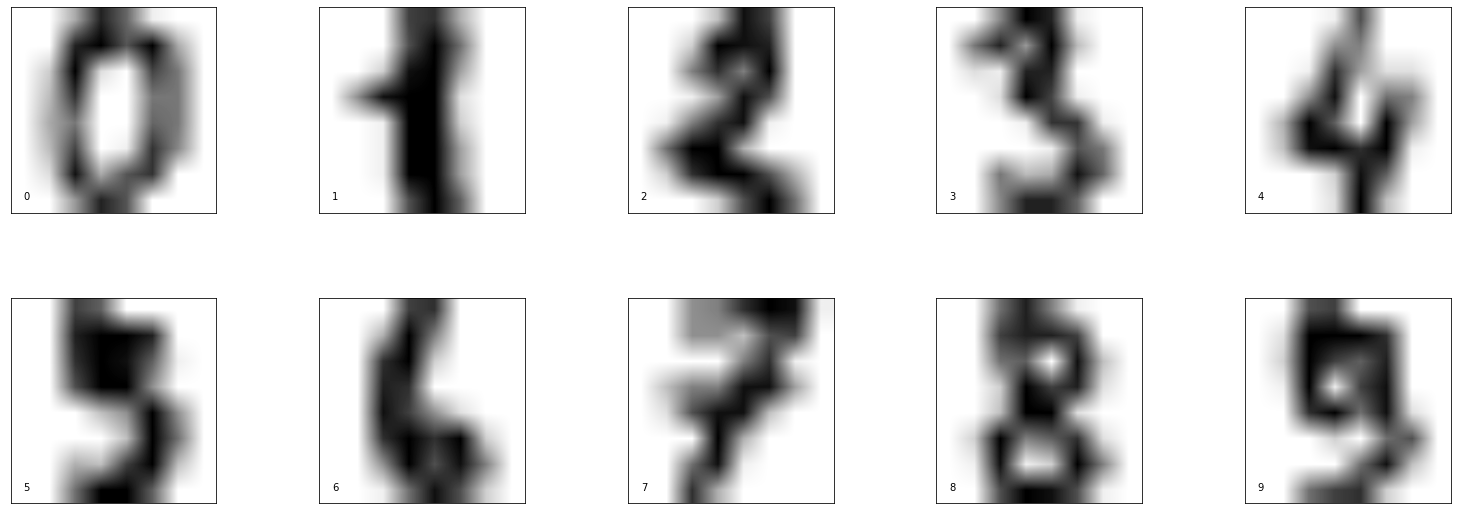

In [ ]:
fig = plt.figure(figsize=(20, 20)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.5)

for i in range(10):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='bilinear')
    ax.text(0, 7, str(digits.target[i]))

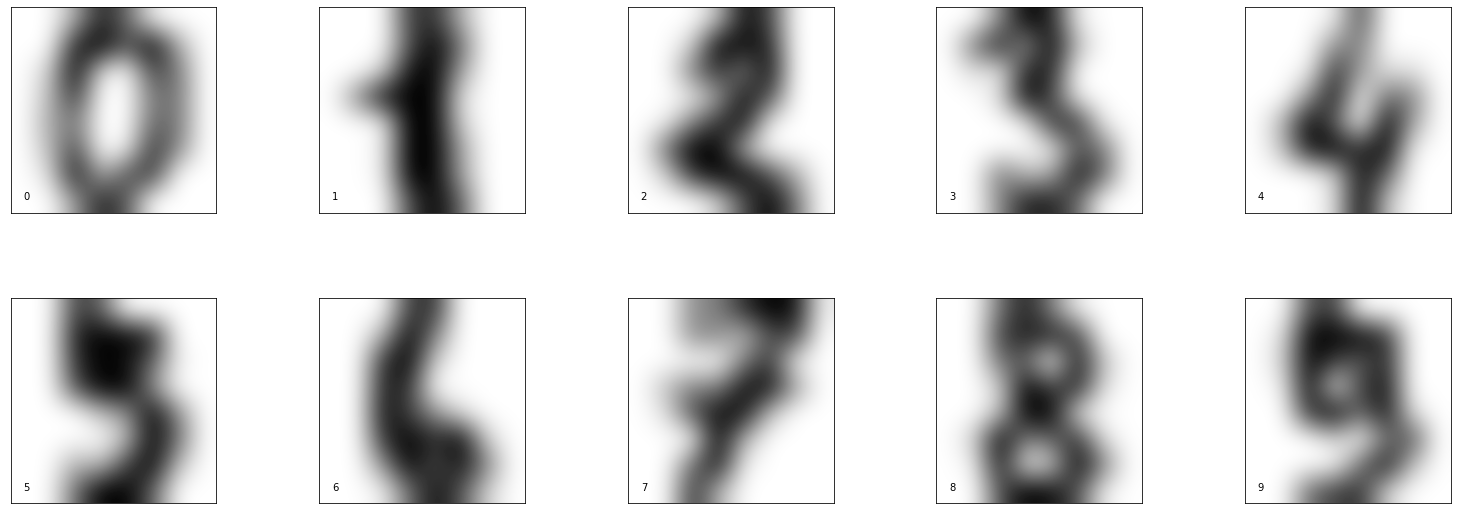

In [ ]:
fig = plt.figure(figsize=(20, 20)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.5)

for i in range(10):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='bicubic')
    ax.text(0, 7, str(digits.target[i]))

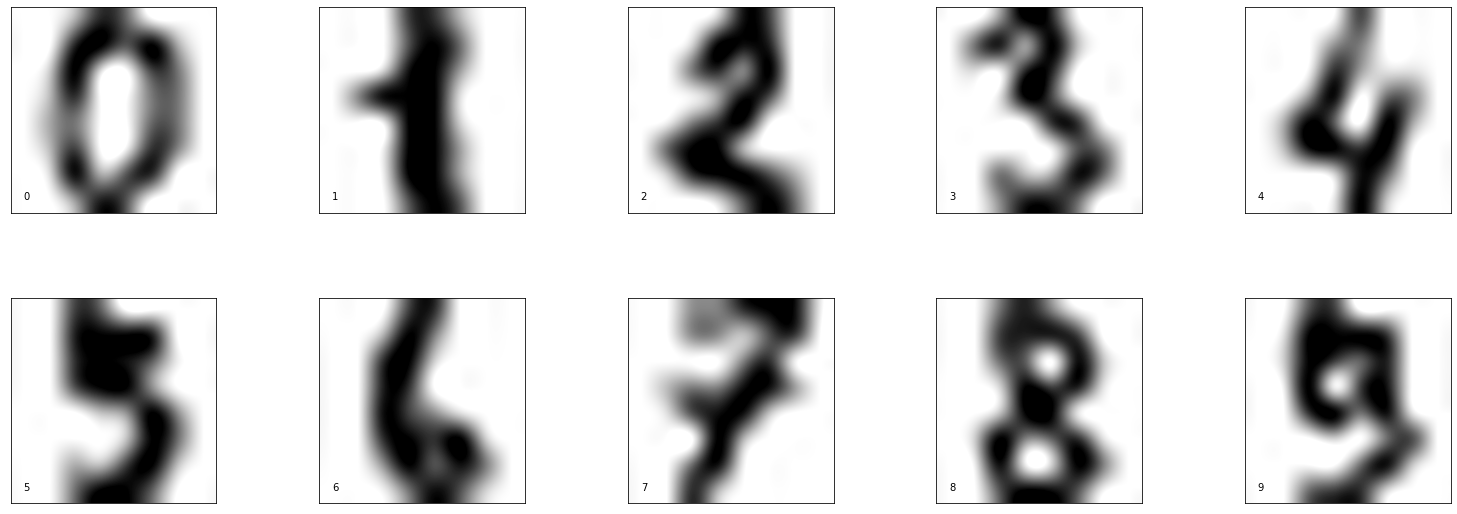

In [ ]:
fig = plt.figure(figsize=(20, 20)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.5)

for i in range(10):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='spline36')
    ax.text(0, 7, str(digits.target[i]))

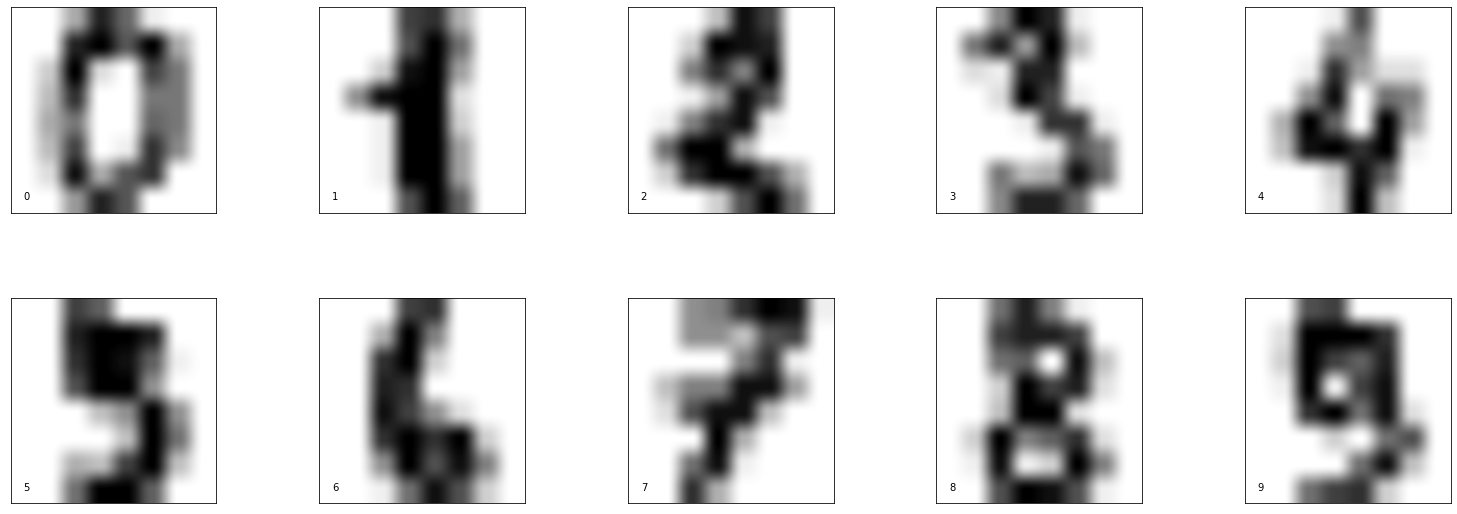

In [ ]:
fig = plt.figure(figsize=(20, 20)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.5)

for i in range(10):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='hanning')
    ax.text(0, 7, str(digits.target[i]))

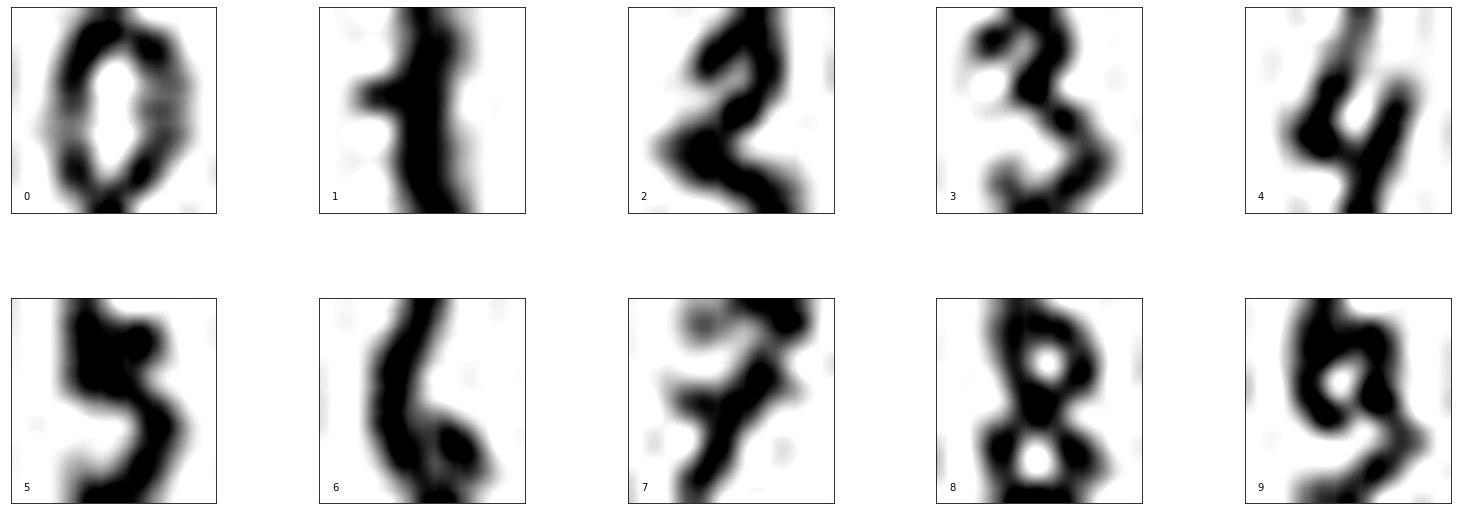

In [ ]:
fig = plt.figure(figsize=(20, 20)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.5)

for i in range(10):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='sinc')
    ax.text(0, 7, str(digits.target[i]))

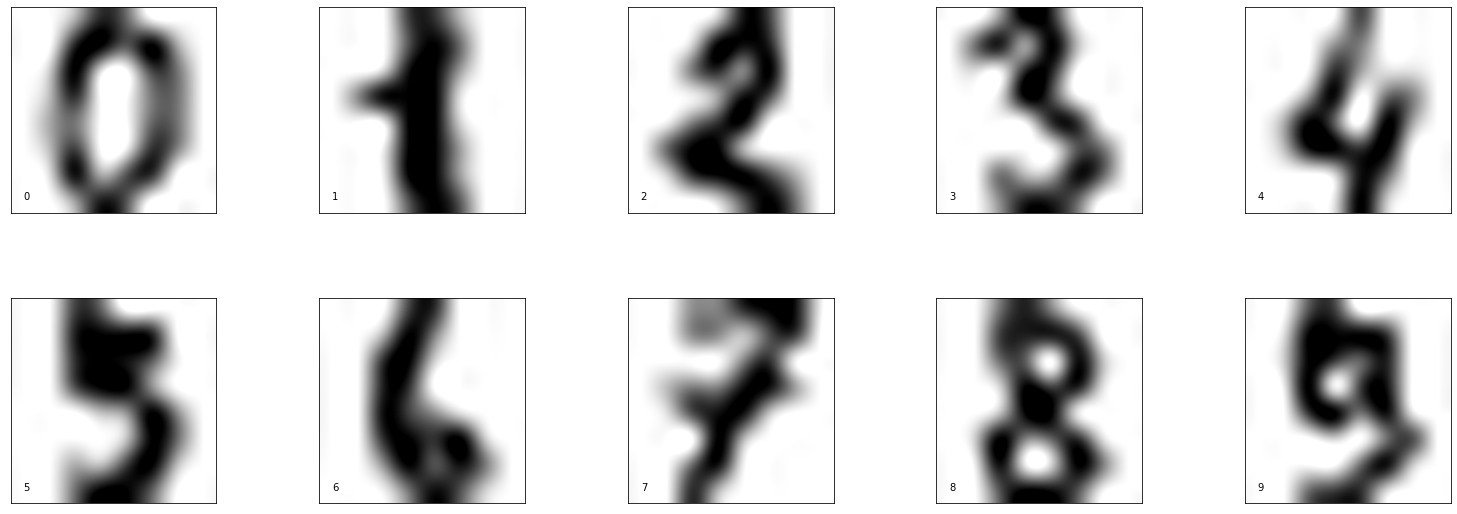

In [ ]:
fig = plt.figure(figsize=(20, 20)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.5)

for i in range(10):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='blackman')
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df
y=digits.target

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 9)

In [ ]:
print(f"The shape of the x train is: {xtrain.shape}")
print(f"The shape of the x test is: {xtest.shape}")
print(f"The shape of the y train is: {ytrain.shape}")
print(f"The shape of the y test is: {ytest.shape}")

The shape of the x train is: (1437, 64)
The shape of the x test is: (360, 64)
The shape of the y train is: (1437,)
The shape of the y test is: (360,)


In [ ]:
print(f"The length of the x train is: {len(xtrain)}")
print(f"The length of the x test is: {len(xtest)}")
print(f"The length of the y train is: {len(ytrain)}")
print(f"The length of the y test is: {len(ytest)}")

The length of the x train is: 1437
The length of the x test is: 360
The length of the y train is: 1437
The length of the y test is: 360


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred = model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score

print("accuracy = ", accuracy_score(ytest, pred))
print("recall_score = ",recall_score(ytest, pred,average=None))
print("F1 score = ",f1_score(ytest, pred,average=None))

accuracy =  0.9805555555555555
recall_score =  [0.96969697 1.         1.         1.         1.         0.94871795
 1.         0.96428571 0.97222222 0.94285714]
F1 score =  [0.98461538 0.98765432 1.         0.98550725 0.97619048 0.97368421
 1.         0.98181818 0.97222222 0.94285714]


In [ ]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(ytest, pred) 
print(cn)

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  1  0 37  0  0  0  1]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  1]
 [ 0  1  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  1  0  0  0  1 33]]


In [ ]:
a_model = SVC(kernel = 'rbf',C=0.3)
a_model.fit(xtrain, ytrain)

SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
a_pred = a_model.predict(xtest)

In [ ]:
a = accuracy_score(ytest, a_pred)
a

0.9805555555555555

In [ ]:
b_model = SVC(kernel = 'poly',gamma='scale')
b_model.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
b_pred = b_model.predict(xtest)

In [ ]:
c = accuracy_score(ytest, b_pred)
c

0.9888888888888889